In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_under = cv2.imread("../data/hdr/hdr_test_-2.jpg")
image_middle = cv2.imread("../data/hdr/hdr_test_0.jpg")
image_over = cv2.imread("../data/hdr/hdr_test_+2.jpg")

In [42]:
assert image_under.shape == image_middle.shape == image_over.shape

In [51]:
image_under.dtype

dtype('uint8')

3 bracketed shots 2 EV apart at f/10

Shutter speeds are:
- -2: 1/500
- 0: 1/125
- +2: 1/40 (125 ISO?)

In [43]:
images = [image_under, image_middle, image_over]

# crop images to 5/4 ratio
long_side = max(image_middle.shape[:2])
short_side = min(image_middle.shape[:2])
for i in range(len(images)):
    start_long = long_side - (5*(short_side//4))
    images[i] = images[i][start_long:long_side, 0:short_side]

# shutter speeds used
exposure_times = np.array([1/500, 1/125, 1/40], dtype=np.float32) 

In [44]:

merge_debevec = cv2.createMergeDebevec()
hdr = merge_debevec.process(images, times=exposure_times.copy())

In [67]:
tonemap = cv2.createTonemapReinhard(gamma=1.9, intensity=0, light_adapt=0, color_adapt=0)
ldr = tonemap.process(hdr)
ldr_8bit = np.clip(ldr * 255, 0, 255).astype(np.uint8)

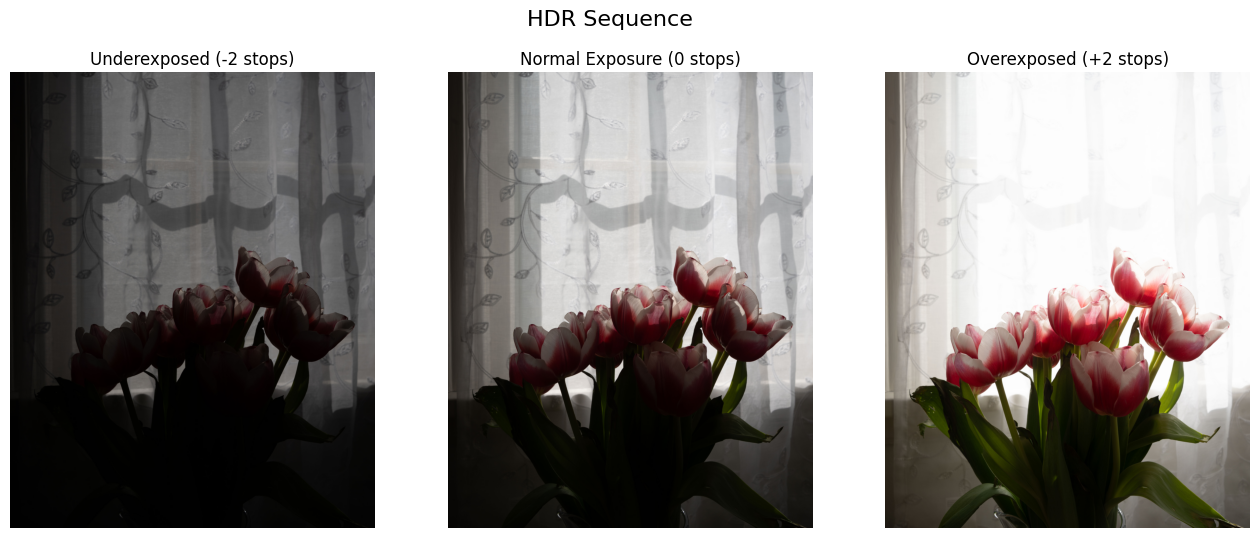

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
titles = ["Underexposed (-2 stops)", "Normal Exposure (0 stops)", "Overexposed (+2 stops)"]

for ax, img, title in zip(axes, images, titles):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")  # Hide axes

fig.suptitle("HDR Sequence", fontsize=16)
plt.show()

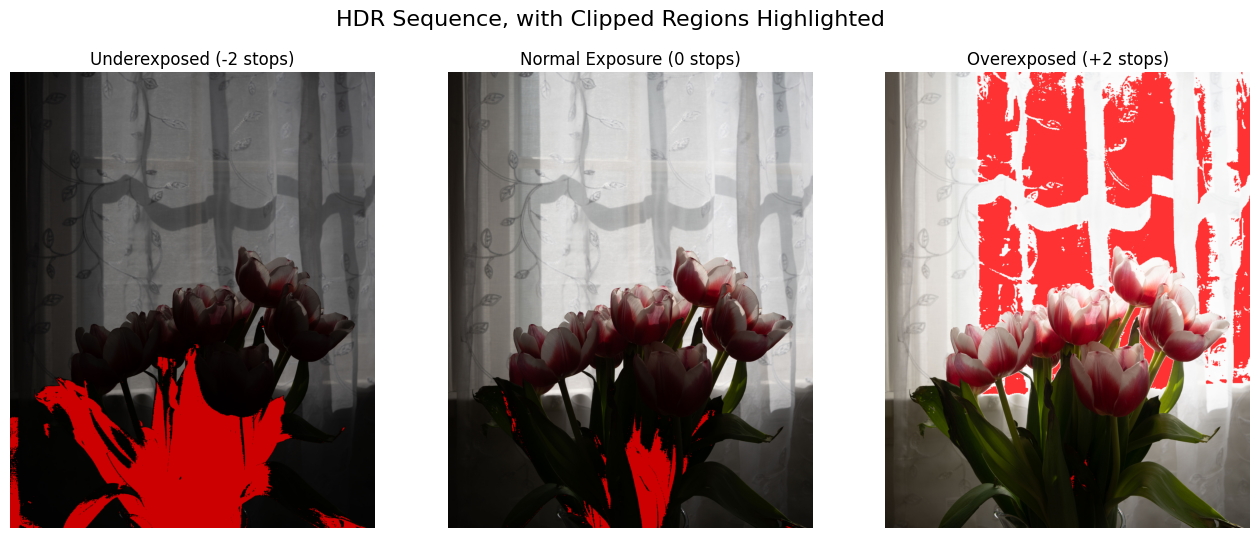

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
titles = ["Underexposed (-2 stops)", "Normal Exposure (0 stops)", "Overexposed (+2 stops)"]

def highlight_clipped(img, ax, title):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = (img >= 253).all(axis=2) | (img <= 1).all(axis=2)

    overlay = img_rgb.copy()
    overlay[mask] = [255, 0, 0]

    # alpha blending
    alpha = 0.8
    blended = img_rgb.copy()
    blended[mask] = (1 - alpha) * img_rgb[mask] + alpha * overlay[mask]

    ax.imshow(blended)
    ax.set_title(title)
    ax.axis("off")

# Apply function to all three images
for ax, img, title in zip(axes, images, titles):
    highlight_clipped(img, ax, title)
    
fig.suptitle("HDR Sequence, with Clipped Regions Highlighted", fontsize=16)
plt.show()

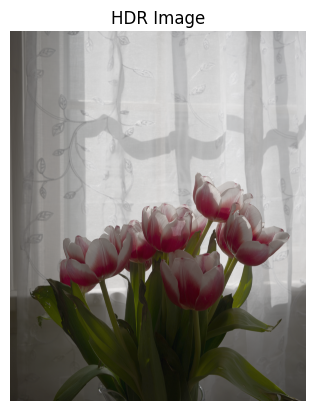

In [68]:
ldr_8bit_rgb = cv2.cvtColor(ldr_8bit, cv2.COLOR_BGR2RGB)

# plt.figure(figsize=(10, 6))
plt.imshow(ldr_8bit_rgb)
plt.axis("off")
plt.title("HDR Image")
plt.show()